Question 1 a)

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import warnings 
warnings.simplefilter('ignore')

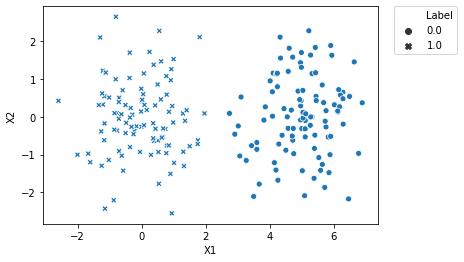

In [167]:
mean1 = np.array([0,0])
covariance = np.array([[1,0],[0,1]])
number_of_sample = 100
x1 = np.random.multivariate_normal(mean1, covariance, size=number_of_sample)
mean2 = np.array([5,0])
x2 = np.random.multivariate_normal(mean2, covariance, size=number_of_sample)
class_label1 = np.ones((x1.shape[0],1))
class_label2 = np.zeros((x2.shape[0],1))
x1 = np.append(class_label1,x1,axis=1)
x2 = np.append(class_label2,x2,axis=1)
data = np.concatenate((x1,x2))
df = pd.DataFrame({"X1" : data[:,1] , "X2" : data[:,2] , "Label" : data[:,0]})
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="X1",y="X2",data=df,palette=cmap,style="Label")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Question 1 b)

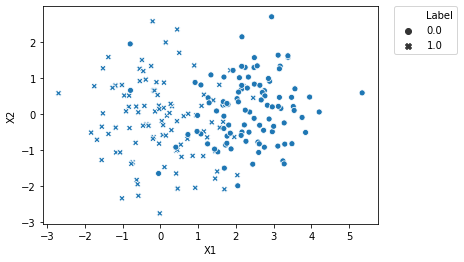

In [166]:
mean1 = np.array([0,0])
covariance = np.array([[1,0],[0,1]])
number_of_sample = 100
x1 = np.random.multivariate_normal(mean1, covariance, size=number_of_sample)
mean2 = np.array([2.25,0])
x2 = np.random.multivariate_normal(mean2, covariance, size=number_of_sample)
class_label1 = np.ones((x1.shape[0],1))
class_label2 = np.zeros((x2.shape[0],1))
x1 = np.append(class_label1,x1,axis=1)
x2 = np.append(class_label2,x2,axis=1)
data2 = np.concatenate((x1,x2))
df2 = pd.DataFrame({"X1" : data2[:,1] , "X2" : data2[:,2] , "Label" : data2[:,0]})
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="X1",y="X2",data=df2,palette=cmap,style="Label")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Question 1 c)

In [80]:
df3 = pd.DataFrame({"X1" : data[:,1] , "X2" : data[:,2] , "Label" : data[:,0]})
df3 = df3.sample(frac=1).reset_index(drop=True)

In [83]:
# without stratified sampling
X = df3.drop(df3.columns[-1],axis=1)
y = df3["Label"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=50,stratify=None)
LR = LogisticRegression()
LR.fit(X_train,y_train)
predicts = LR.predict(X_test)
print(accuracy_score(y_test,predicts))

0.9696969696969697


In [87]:
# with stratified sampling
X = df3.drop(df3.columns[-1],axis=1)
y = df3["Label"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=50,stratify=y)
# print(y_test.value_counts())
LR = LogisticRegression()
LR.fit(X_train,y_train)
predicts = LR.predict(X_test)
print(accuracy_score(y_test,predicts))

1.0


Question 1 d)

Hypothesis space of logistic regression limits it's cost function value between 0 and 1. Multiple hypothesis make hypothesis space.In this example, hypothesis is a classification rule which will say probability values greater than 0.5 will belong to class 1 and probability values less than 0.5 will belong to class 0.

Question 1 e)

True Target function is the function we are trying to mimic in predictive modelling but with small set of data. Can be considered as the underlying true data generating function. Here true target function for logistic regression is the values of distribution which we are generating as input.


In [171]:
# Question 1 f) 
from sklearn.tree import DecisionTreeClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn.ensemble import BaggingClassifier
mean1 = np.array([0,0])
covariance = np.array([[1,0],[0,1]])
number_of_sample = 100
x1 = np.random.multivariate_normal(mean1, covariance, size=number_of_sample)
mean2 = np.array([2.25,0])
x2 = np.random.multivariate_normal(mean2, covariance, size=number_of_sample)
X = np.concatenate((x1,x2))
y = np.concatenate((np.ones((x1.shape[0],1)), np.zeros((x2.shape[0],1))))
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=100,stratify=y)
DT = DecisionTreeClassifier(random_state=100)
DT.fit(X_train,y_train)
predicts = DT.predict(X_test)
print("DT Accuracy",accuracy_score(y_test,predicts))

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        DT, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=100)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

bag = BaggingClassifier(base_estimator=DT,
                        n_estimators=100,
                        random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        bag, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

DT Accuracy 0.8333333333333334
Average expected loss: 0.500
Average bias: 33.000
Average variance: 0.074
Average expected loss: 0.500
Average bias: 33.000
Average variance: 0.045


In [158]:
# Question 2 a)
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data  
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1)
# print(X_train.shape,X_val.shape,X_test.shape)

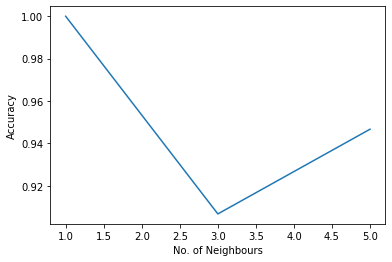

In [168]:
# Question 2 b)
from sklearn.neighbors import KNeighborsClassifier
neighbours = [1,3,5]
accuracy = []
accuracy_test = []
for n in neighbours:
    KNN = KNeighborsClassifier(n_neighbors=n)
    KNN.fit(X_train,y_train)
    accuracy.append(KNN.score(X_train,y_train))
#     predict = KNN.predict(X_test)
#     accuracy_test.append(accuracy_score(predict,y_test))
plt.plot(neighbours,accuracy)
# plt.plot(neighbours,accuracy_test)
plt.xlabel('No. of Neighbours')
plt.ylabel('Accuracy')
plt.show()
# Best value of k is : 5

In [160]:
#  Question 2 c) 
from sklearn.model_selection import GridSearchCV
k_range = [1,3,5,7,9,11,13,15,17,19]
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')
grid.fit(X,y)
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9866666666666667
{'n_neighbors': 11, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')


1.0


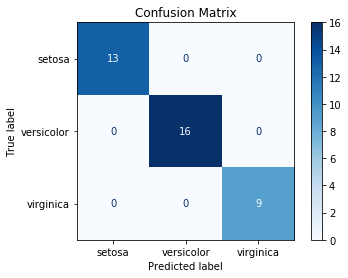

In [169]:
# Question 2 d) 
# Selecting k = 5 
from sklearn.metrics import plot_confusion_matrix
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
predict = KNN.predict(X_test)
print(accuracy_score(predict,y_test))
disp = plot_confusion_matrix(KNN, X_test, y_test,
                                 display_labels=iris.target_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

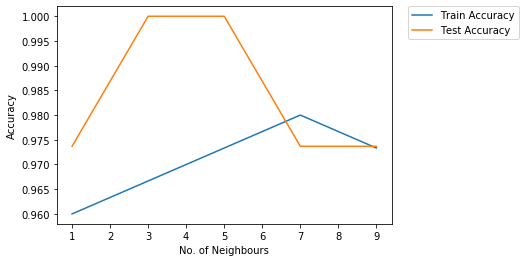

In [170]:
# Question 2 e)
from sklearn.model_selection import cross_val_score,cross_val_predict
neighbours = [1,3,5,7,9]
accuracy = []
scores = []
accuracy_test = []
for n in neighbours:
    KNN = KNeighborsClassifier(n_neighbors=n)
    KNN.fit(X_train,y_train)
    scores.append(cross_val_score(KNN,X,y,cv=5).mean())
    predict = KNN.predict(X_test)
    accuracy_test.append(accuracy_score(predict,y_test))
plt.plot(neighbours,scores,label="Train Accuracy")
plt.plot(neighbours,accuracy_test,label="Test Accuracy")
plt.xlabel('No. of Neighbours')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Selected model is K = 7 , as it is giving highest accuracy on train data , and in the method before where cross validation was not used model k =5 was selected as it gave highest accuracy of around 95%.

 Question 3 a)

hyper parameters for logisitic regression are :
 penalty='l2', tol=0.0001 (tolerence for stopping criteria) , C=1.0 (Inverse of regularization strength),
 max_iter=100 (Maximum number of iterations taken for the solvers to converge)

hyper parameters for Naive Bayes classifier are :
Prior probabilities of the classes with shape (n_classes,)
var_smoothing : float (default=1e-9) Portion of the largest variance of all features


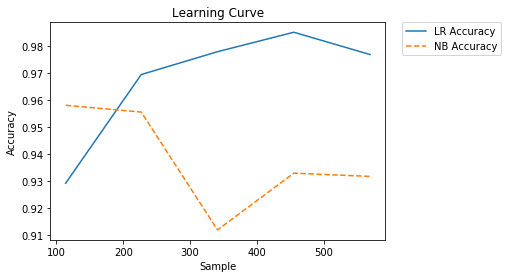

In [151]:
# Question 3 b)
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit,cross_validate
from sklearn.preprocessing import StandardScaler
cancer_dataset = datasets.load_breast_cancer()
X = cancer_dataset.data
y = cancer_dataset.target
X_samples = [114,227,341,455,569]    #[0.2,0.4,0.6,0.8,1.0]
Accuracy_LR = []
Accuracy_NB = []
data = np.c_[cancer_dataset.data, cancer_dataset.target]
columns = np.append(cancer_dataset.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)

for i in X_samples:
    sample = df.sample(i)
    Xt = sample[sample.columns[:-1]]
    yt = sample.target
    sc = StandardScaler()
    Xt = sc.fit_transform(Xt)
    cv = ShuffleSplit(n_splits=5, test_size=0.33, random_state=0)
    
    LR = LogisticRegression(max_iter=3000)
    scores_LR = cross_validate(LR,Xt,yt,cv=5,scoring="precision_macro")
    Accuracy_LR.append(scores_LR['test_score'].mean())

    GNB = GaussianNB()
    scores_NB = cross_validate(GNB,Xt,yt,cv=5,scoring="precision_macro")
    Accuracy_NB.append(scores_NB['test_score'].mean())
    
plt.plot(X_samples,Accuracy_LR,label='LR Accuracy')
plt.plot(X_samples,Accuracy_NB,label='NB Accuracy',ls='--')
plt.xlabel('Sample')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Learning Curve")
plt.show()

Question 3 c)

As the number of samples increased from 20 to 40% there was a huge rise in accuracy for Logistic Regression and then it was almost similar for rest of the samples but for Naive Bayes Accuracy was nearly same throughout.

In [111]:
#  Question 4 a) 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories)
newsgroup_df = pd.DataFrame(data=newsgroups_train.data,columns=['Text'])
newsgroup_df['Target'] = pd.Series(newsgroups_train.target)
count_vector = CountVectorizer(stop_words='english')
words = count_vector.fit_transform(newsgroup_df['Text'])
X_train, X_test, y_train, y_test = train_test_split(words.toarray(), newsgroup_df['Target'], test_size=0.33,random_state=1)
LR = LogisticRegression(random_state=1)
DT = DecisionTreeClassifier(random_state=1)
score1 = LR.fit(X_train, y_train).score(X_test, y_test)
score2 = DT.fit(X_train, y_train).score(X_test, y_test)
print('Logistic regression accuracy: %.2f%%' % (score1*100))
print('Decision tree accuracy: %.2f%%' % (score2*100))

Logistic regression accuracy: 93.30%
Decision tree accuracy: 81.40%


Question 4 b) 

Null hypothesis :  Both algorithms perform equally well on the dataset

Alternate hypothesis : Performance of the two algorithms is significantly different

Let's assume a significance threshold of α=0.05 for rejecting the 
null hypothesis that both algorithms perform equally well on the dataset 

In [112]:
#  Question 4 c) 
from mlxtend.evaluate import paired_ttest_5x2cv
t, p = paired_ttest_5x2cv(estimator1=LR,estimator2=DT,X=words.toarray(), y=newsgroup_df['Target'],random_seed=1)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 13.448
p value: 0.000


Question 4 d) 

Since p < α, we can reject the null hypothesis 
and may conclude that the performance of the two algorithms is significantly different.